 # Correlation in Python 

#### In this project I will explore correlation between defferent caterories in Movie Industry. I m exprecting to se high correlation between budget and groos eranings but also I want to see can I find more higt correlations

In [2]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#### Importing and cleaning dataset 

In [3]:
#Read in the data 

movies_df = pd.read_csv(r'/Users/nerminbecirovic/Downloads/movies.csv')
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Cheacking for a missing data 

for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Removig missing data

movies_df = movies_df.dropna(axis=0, how='any')

#Cheacking angain for a missing data 
for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
#Data type for our columns 

movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Change data type for columns 

movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')
movies_df['votes'] = movies_df['votes'].astype('int64')
movies_df['runtime'] = movies_df['runtime'].astype('int64')
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [8]:
movies_df = movies_df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [9]:
#Drop any duplicates 
movies_df = movies_df.drop_duplicates()
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


#### Making different plots like scatterplot,regplot and heatmaps to find correlation 

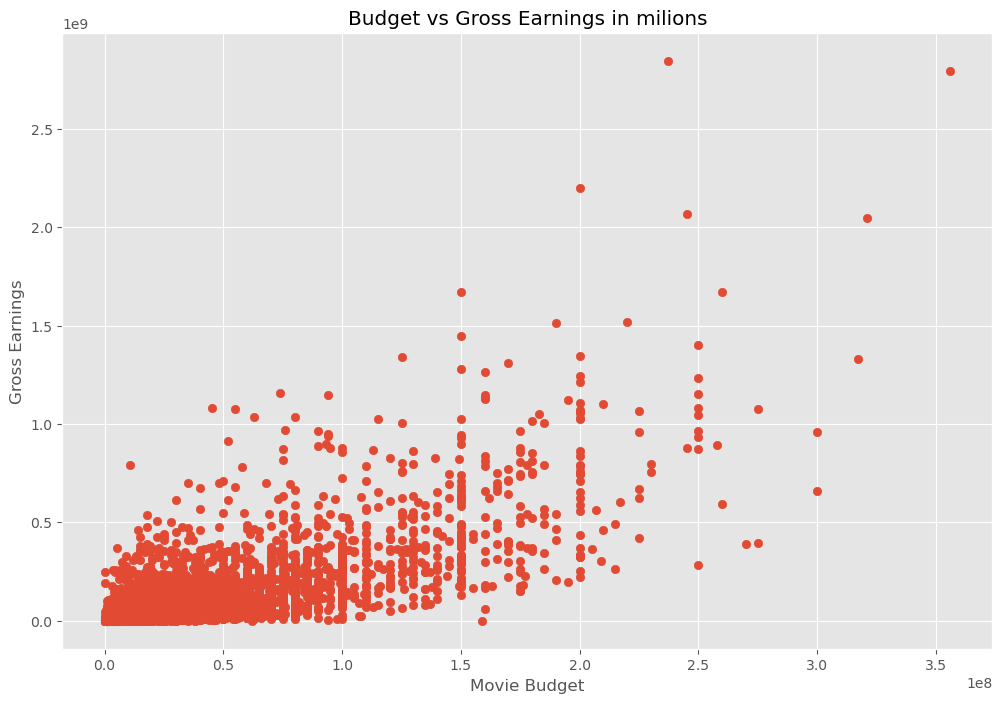

In [10]:
plt.scatter(x = movies_df['budget'], y = movies_df['gross'])
plt.title('Budget vs Gross Earnings in milions')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Earnings')
plt.show()

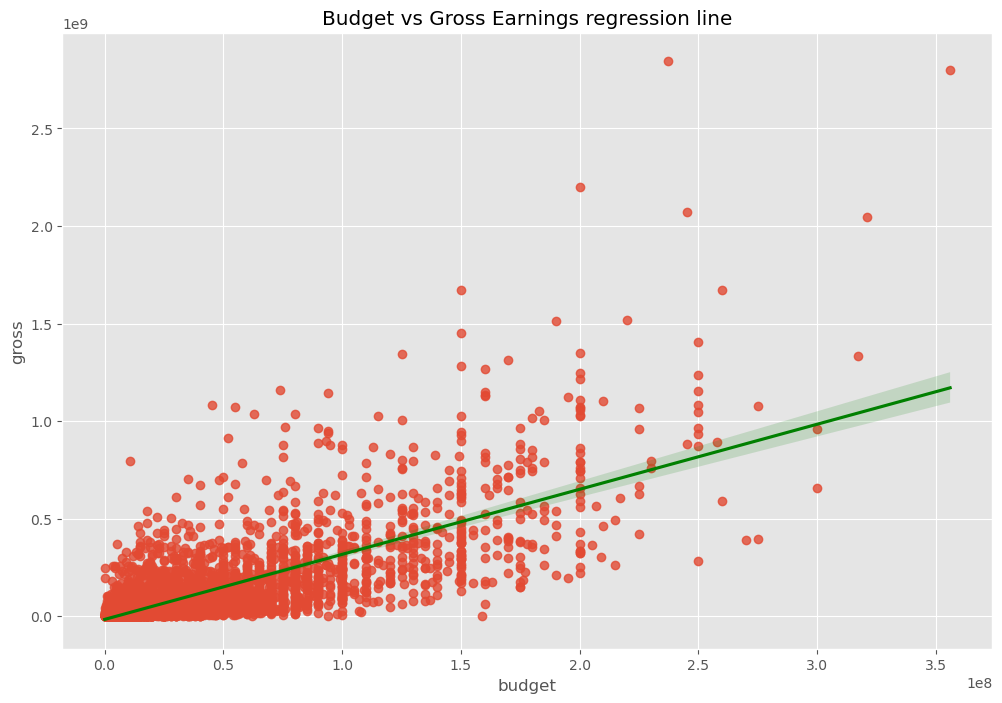

In [11]:
#Plot budget vs gross using seaborn, so we can see regression 
sns.regplot(x = 'budget', y = 'gross',data = movies_df,line_kws = {'color':'green'})
plt.title('Budget vs Gross Earnings regression line')
plt.show()

In [12]:
movies_df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


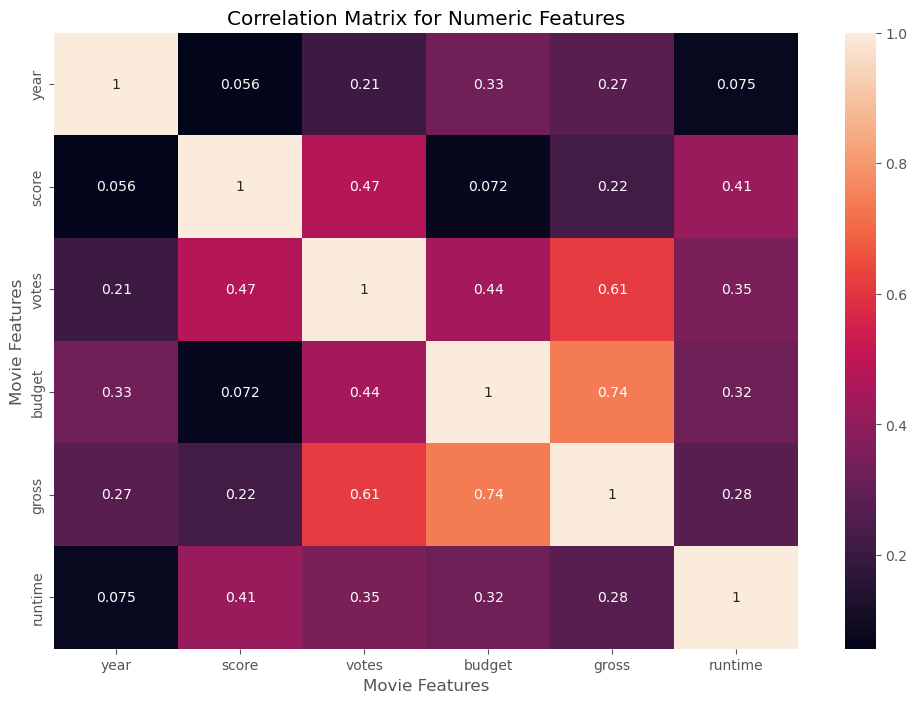

In [14]:
#Visualazing correlation 

correlation_matrix = movies_df.corr(method = 'pearson')

sns.heatmap(correlation_matrix,annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
#If we want to se correlation between all columns,I need to convert non numberized columns in numerized columns 

movies_df_numerized = movies_df

for col_name in movies_df_numerized:
    if (movies_df_numerized[col_name].dtype == 'object'):
        movies_df_numerized[col_name] =  movies_df_numerized[col_name].astype('category')
        movies_df_numerized[col_name] =  movies_df_numerized[col_name].cat.codes
movies_df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
2434,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
3681,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


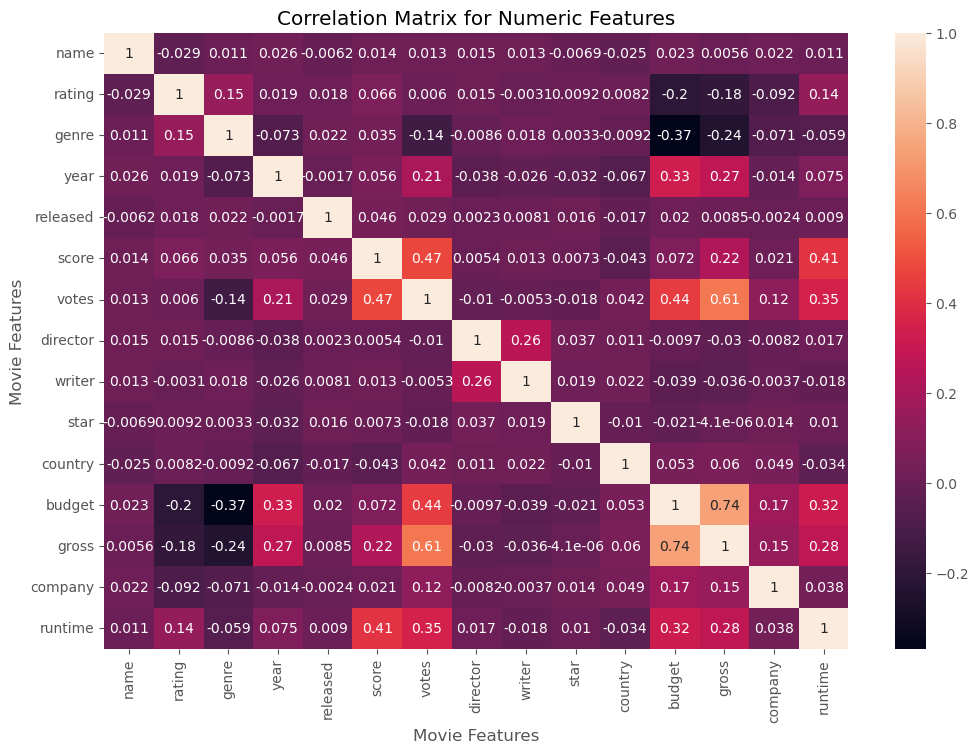

In [16]:
correlation_matrix = movies_df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix,annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### Checking for other correlations 

In [17]:
#Find heigh coerreliterd pairs 

corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.368523
genre    budget    -0.368523
         gross     -0.244101
gross    genre     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
hight_sorted_pairs = sorted_pairs[(sorted_pairs) > 0.5]
hight_sorted_pairs

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

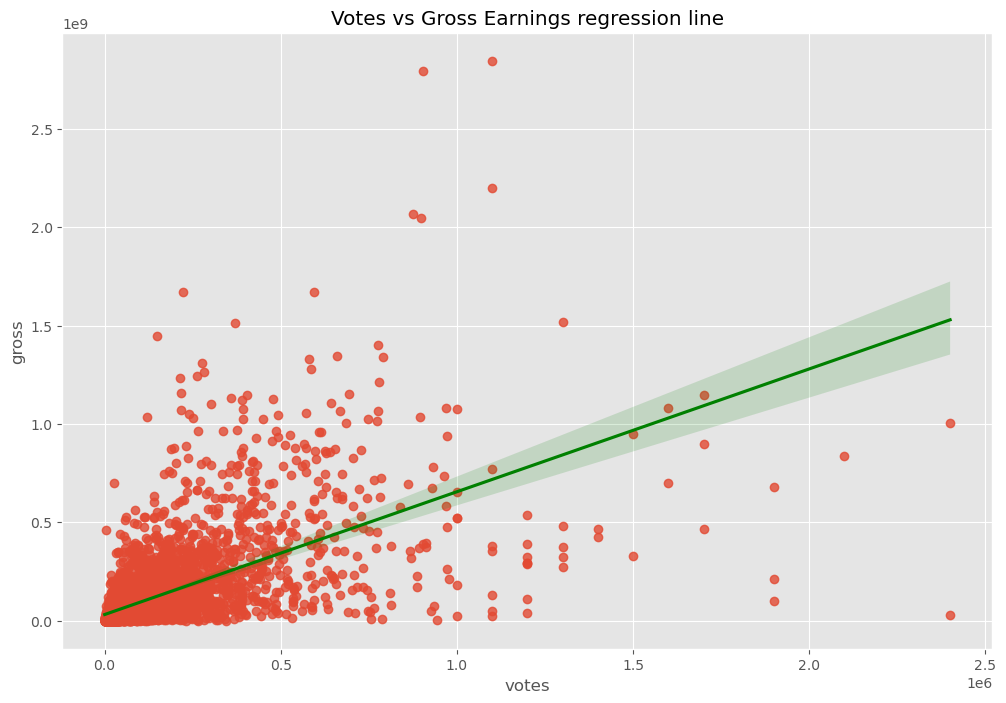

In [19]:
sns.regplot(x = 'votes', y = 'gross',data = movies_df,line_kws = {'color':'green'})
plt.title('Votes vs Gross Earnings regression line')
plt.show()

#### I found high correlation between votes, gross and budget